In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neo
from pathlib import Path

In [23]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp\results_profiles')

files = Path(data_dir).glob("./**/Conductance*.npy")
#ephys_files = Path(r'R:\home\firefly_link\468_patch_clamp').glob("./**/*.smr")

smr_names = [str(f) for f in files]
#ephys_names = [str(f) for f in ephys_files]

dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['SMR_file'] = smr_names
#df['ephys_file'] = ephys_names

for data in df.itertuples():
    s = data.SMR_file

    par = Path(s).parts

    dates.append(int(par[par.index("468_patch_clamp") + 2][:8]))
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df = df[df['date']>20231023]
expt = []
for data in df.itertuples():
    s=data.SMR_file
    if 'ttx' in s.lower():
        expt.append('ttx')
    else:
        expt.append('none')
df['expt'] = expt
#df.to_csv('df_conductance.csv')
df

,SMR_file,date,slip,cell,trial_string,expt
0,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,1,1,468_patch_clamp_results_profiles_20231024_slip...,none
1,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,2,1,468_patch_clamp_results_profiles_20231024_slip...,none
2,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,3,1,468_patch_clamp_results_profiles_20231024_slip...,none
3,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,4,1,468_patch_clamp_results_profiles_20231024_slip...,none
4,R:\home\firefly_link\468_patch_clamp\results_p...,20231025,1,1,468_patch_clamp_results_profiles_20231025_slip...,none
5,R:\home\firefly_link\468_patch_clamp\results_p...,20231025,2,2,468_patch_clamp_results_profiles_20231025_slip...,none
6,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,1,1,468_patch_clamp_results_profiles_20231031_slip...,none
7,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,2,1,468_patch_clamp_results_profiles_20231031_slip...,none
8,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,3,1,468_patch_clamp_results_profiles_20231031_slip...,none
9,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,4,1,468_patch_clamp_results_profiles_20231031_slip...,none


In [72]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp\results_profiles')

files = Path(data_dir).glob("./**/Conductance*.npy")
#ephys_files = Path(r'R:\home\firefly_link\468_patch_clamp').glob("./**/*.smr")

smr_names = [str(f) for f in files]
#ephys_names = [str(f) for f in ephys_files]

dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['SMR_file'] = smr_names
#df['ephys_file'] = ephys_names

for data in df.itertuples():
    s = data.SMR_file

    par = Path(s).parts

    dates.append(int(par[par.index("468_patch_clamp") + 2][:8]))
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df = df[df['date']>20231023]
expt = []
for data in df.itertuples():
    s=data.SMR_file
    if 'ttx' in s.lower():
        expt.append('ttx')
    else:
        expt.append('none')
df['expt'] = expt
#df.to_csv('df_times.csv')
df

,SMR_file,date,slip,cell,trial_string,expt
0,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,1,1,468_patch_clamp_results_profiles_20231024_slip...,none
1,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,2,1,468_patch_clamp_results_profiles_20231024_slip...,none
2,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,3,1,468_patch_clamp_results_profiles_20231024_slip...,none
3,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,4,1,468_patch_clamp_results_profiles_20231024_slip...,none
4,R:\home\firefly_link\468_patch_clamp\results_p...,20231025,1,1,468_patch_clamp_results_profiles_20231025_slip...,none
5,R:\home\firefly_link\468_patch_clamp\results_p...,20231025,2,2,468_patch_clamp_results_profiles_20231025_slip...,none
6,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,1,1,468_patch_clamp_results_profiles_20231031_slip...,none
7,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,2,1,468_patch_clamp_results_profiles_20231031_slip...,none
8,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,3,1,468_patch_clamp_results_profiles_20231031_slip...,none
9,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,4,1,468_patch_clamp_results_profiles_20231031_slip...,none


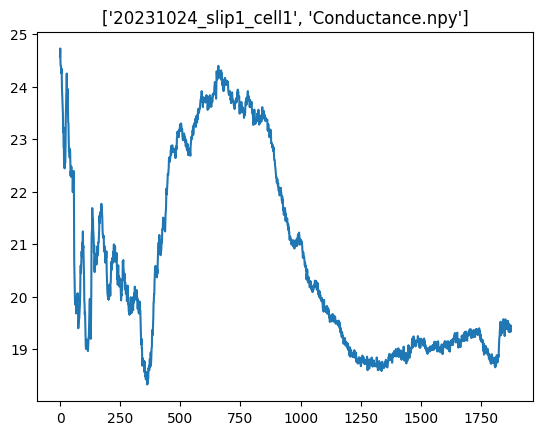

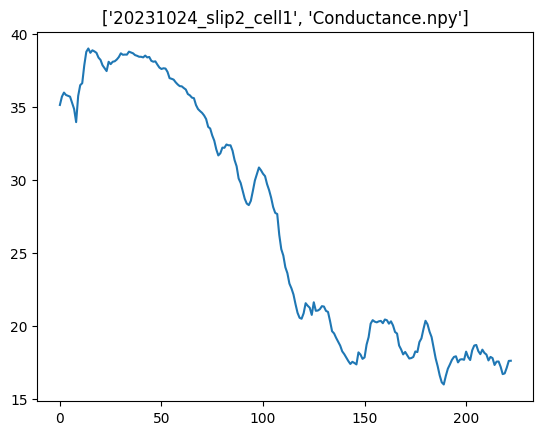

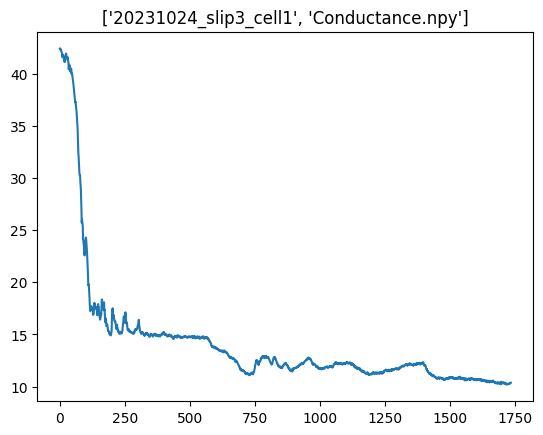

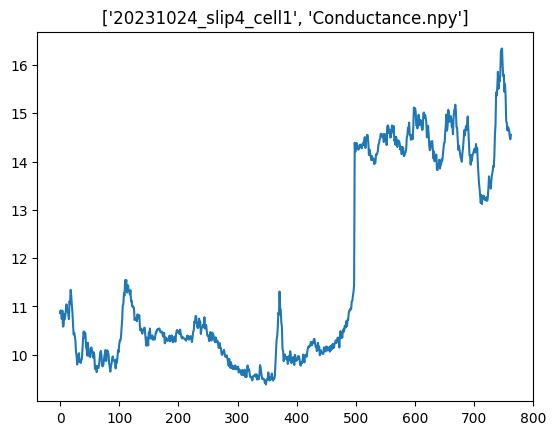

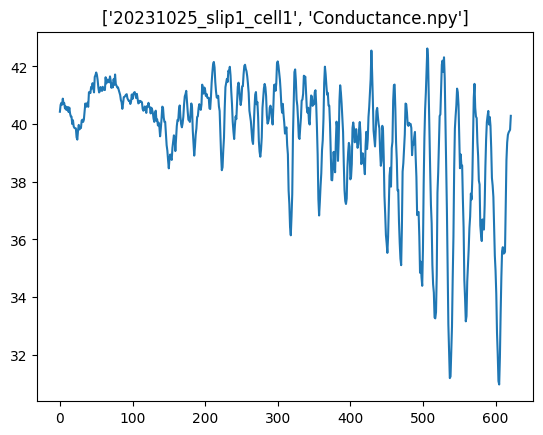

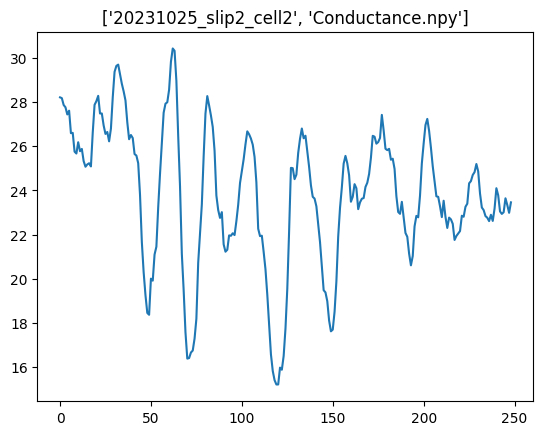

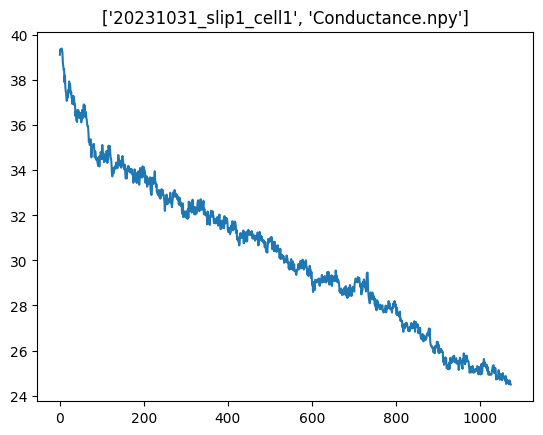

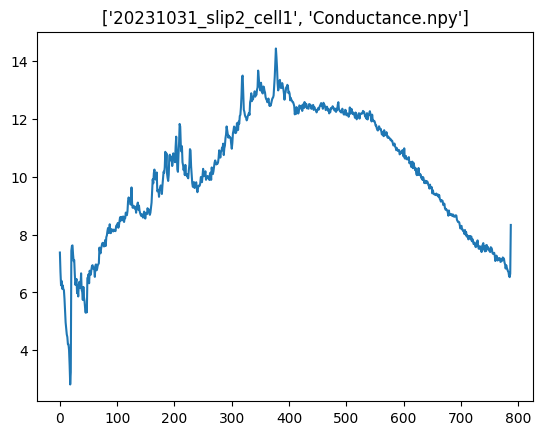

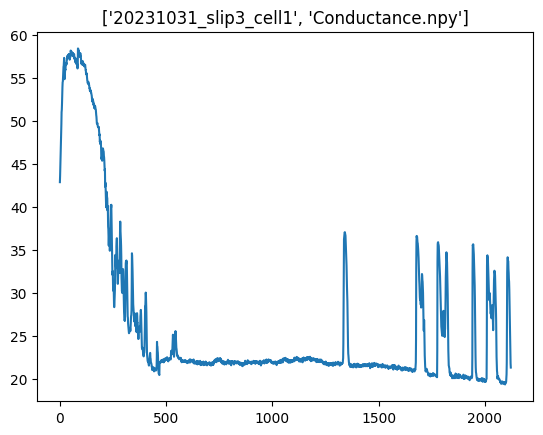

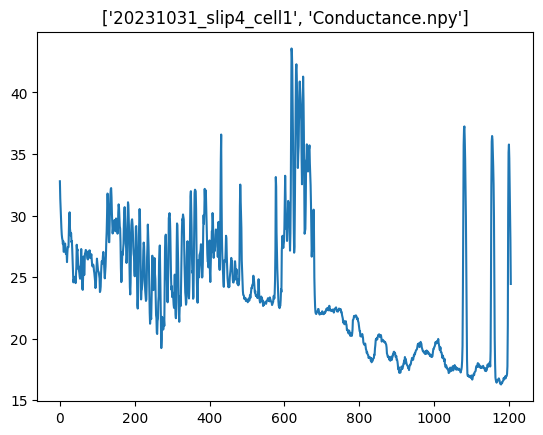

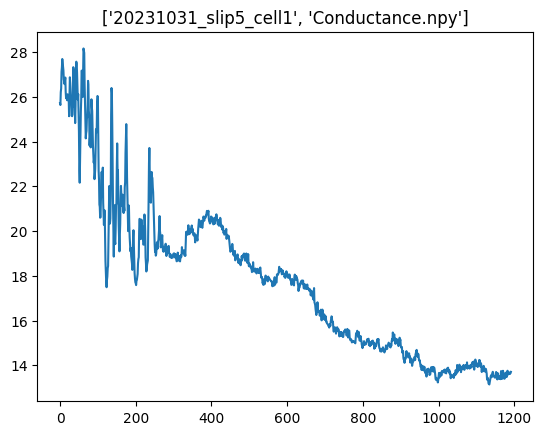

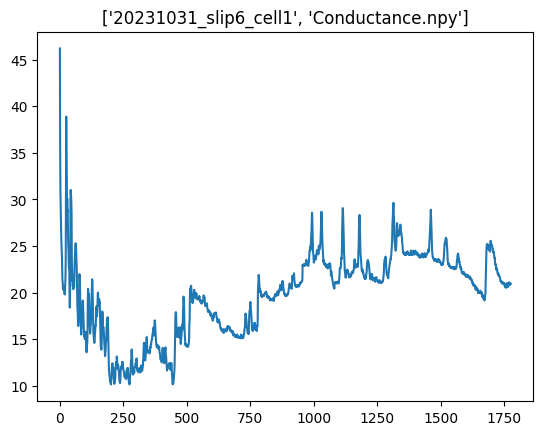

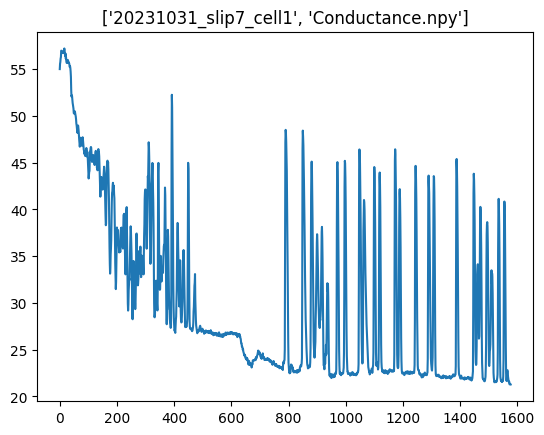

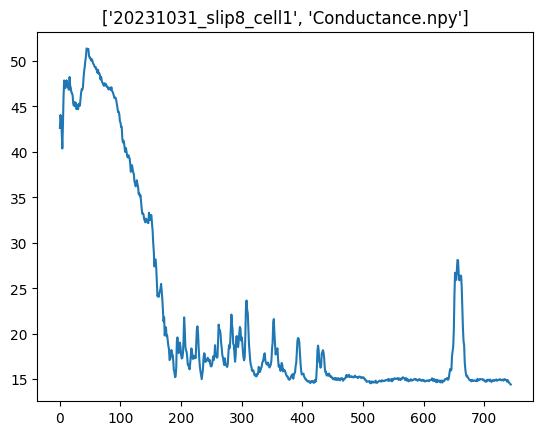

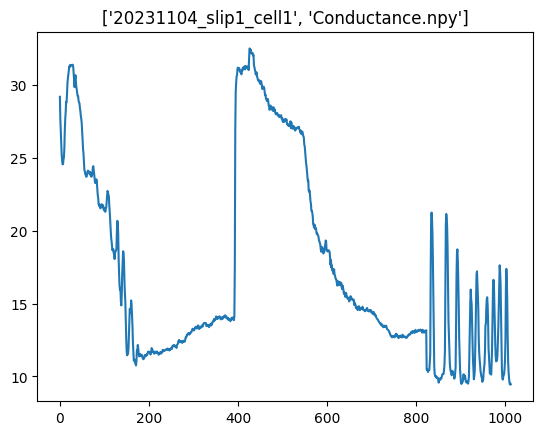

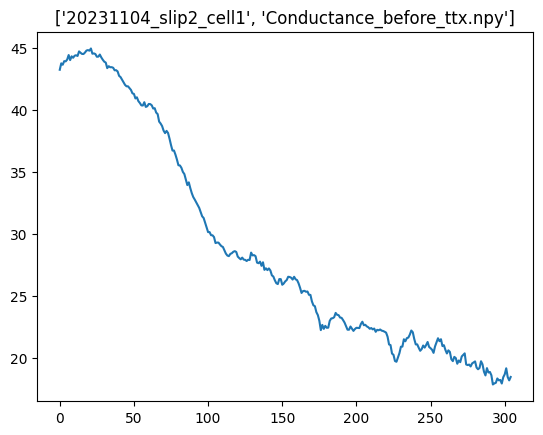

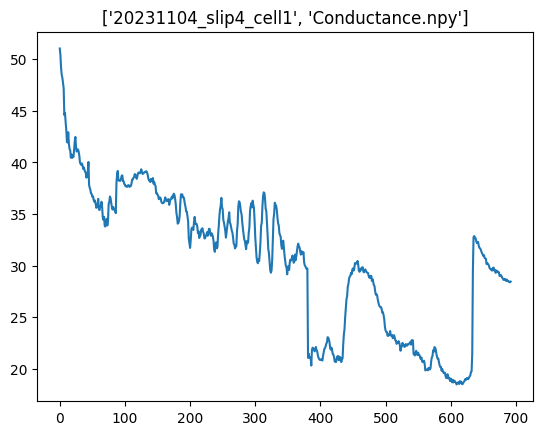

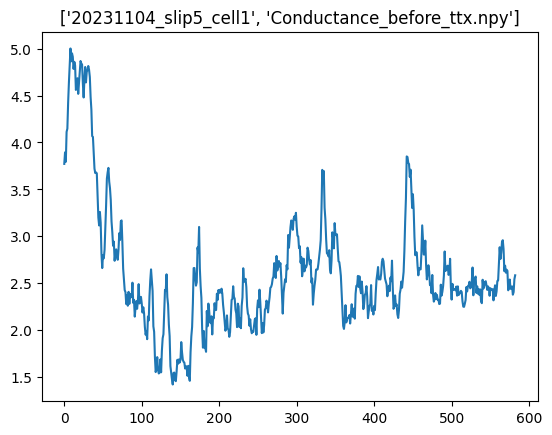

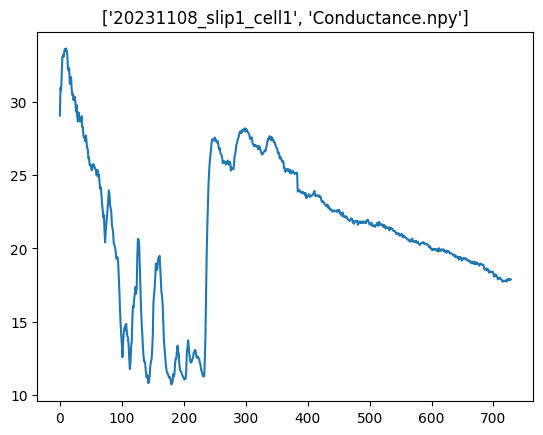

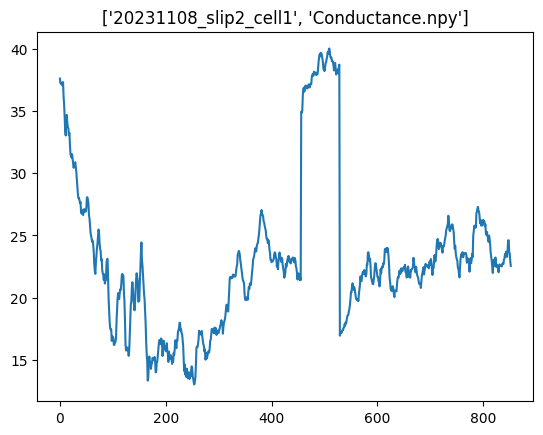

In [81]:
import scipy.stats as stats
df = pd.read_csv(r'R:\home\firefly_link\468_patch_clamp\dataframes\conductance_summary.csv')
g_all = np.array([])
for p in df.G_file:

    g = np.load(Path(p))
    g_all = np.vstack([g_all,g[:150]]) if g_all.size else g[:150]
    z = stats.zscore(g)
    plt.figure()
    plt.plot(g)
    #plt.plot(z)
    plt.title(p.split("\\")[-2:])

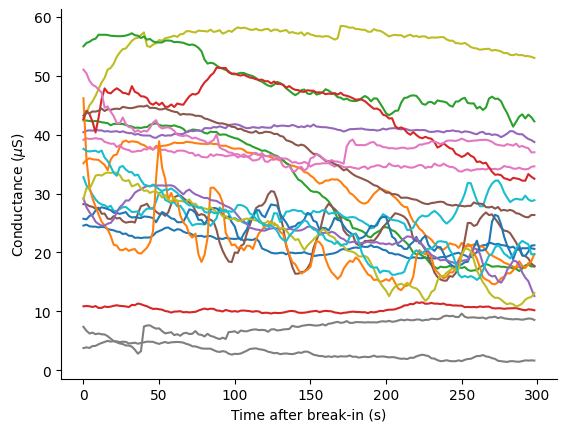

In [82]:
import seaborn as sns
plt.figure()
plt.plot(np.arange(g_all.shape[1])*2,g_all.T)
plt.xlabel('Time after break-in (s)')
plt.ylabel('Conductance ($\mu$S)')
sns.despine()

In [47]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp\results_profiles')

files = Path(data_dir).glob("./**/V_rev.npy")
#ephys_files = Path(r'R:\home\firefly_link\468_patch_clamp').glob("./**/*.smr")

smr_names = [str(f) for f in files]
#ephys_names = [str(f) for f in ephys_files]

dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['SMR_file'] = smr_names
#df['ephys_file'] = ephys_names

for data in df.itertuples():
    s = data.SMR_file

    par = Path(s).parts

    dates.append(int(par[par.index("468_patch_clamp") + 2][:8]))
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df = df[df['date']>20231023]
expt = []
for data in df.itertuples():
    s=data.SMR_file
    if 'ttx' in s.lower():
        expt.append('ttx')
    else:
        expt.append('none')
df['expt'] = expt
#df.to_csv('df_times.csv')
df

,SMR_file,date,slip,cell,trial_string,expt
0,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,1,1,468_patch_clamp_results_profiles_20231024_slip...,none
1,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,2,1,468_patch_clamp_results_profiles_20231024_slip...,none
2,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,3,1,468_patch_clamp_results_profiles_20231024_slip...,none
3,R:\home\firefly_link\468_patch_clamp\results_p...,20231024,4,1,468_patch_clamp_results_profiles_20231024_slip...,none
4,R:\home\firefly_link\468_patch_clamp\results_p...,20231025,1,1,468_patch_clamp_results_profiles_20231025_slip...,none
5,R:\home\firefly_link\468_patch_clamp\results_p...,20231025,2,2,468_patch_clamp_results_profiles_20231025_slip...,none
6,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,1,1,468_patch_clamp_results_profiles_20231031_slip...,none
7,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,2,1,468_patch_clamp_results_profiles_20231031_slip...,none
8,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,3,1,468_patch_clamp_results_profiles_20231031_slip...,none
9,R:\home\firefly_link\468_patch_clamp\results_p...,20231031,4,1,468_patch_clamp_results_profiles_20231031_slip...,none


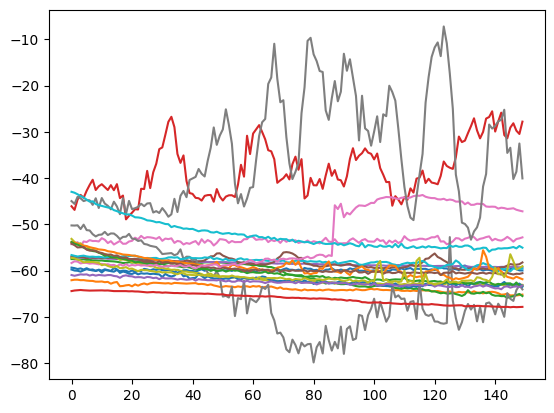

In [61]:
v = np.array([])
for p in df.SMR_file:
    g = np.load(Path(p))
    #plt.figure()
    plt.plot(g[:150])
    v = np.vstack([v,g[:150]]) if v.size else g[:150]
    #plt.title(p.split("\\")[-2])

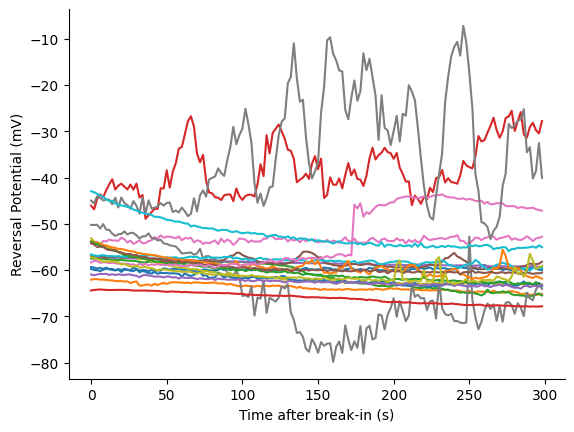

In [66]:
import seaborn as sns
plt.figure()
plt.plot(np.arange(v.shape[1])*2,v.T)
plt.xlabel('Time after break-in (s)')
plt.ylabel('Reversal Potential (mV)')
sns.despine()

g_b = np.load(r'R:\home\firefly_link\468_patch_clamp\results_profiles\20231108_slip2_cell1\Conductance_before_ttx.npy')
g_a = np.load(r'R:\home\firefly_link\468_patch_clamp\results_profiles\20231108_slip2_cell1\Conductance_after_ttx.npy')
c = list(g_b)+list(g_a)
np.save(r'R:\home\firefly_link\468_patch_clamp\results_profiles\20231108_slip2_cell1\Conductance.npy',c)